# **Sobreajuste y Subajuste en modelos de IA**

## **1. Qué es el sobreajuste y subajuste en un modelo de IA?**

Es muy común que al entrenar modelos de IA y obtener una métrica de evaluación del mismo, se piense que ha conseguido el mejor resultado. Luego, a la hora de predecir datos nuevos, el modelo se comporta mucho peor que en el entrenamiento. Esto es un problema muy importante al productivizar modelos, ya que modelos que en desarrollo parecían buenos, al sacarlos a producción son un total desastre. Esto se debe muchas veces al hecho de que esos modelos están sobreajustados o subajutados a los datos de entrenamiento.

Hay que recordar que el objetivo de los modelos de IA es el de obtener patrones de los datos de entrenamiento disponibles de cara a predecir o inferir correctamente datos nuevos. Es decir, el concepto clave es el de entrenar y obtener patrones generales que sean extrapolables a nuevos datos.

* **Definición de sobreajuste:** Se da cuando el modelo aprende demasiado de los datos de entrenamiento, capturando ruido y patrones específicos de ese conjunto, lo que afecta su capacidad de generalización. El modelo es tan ajustado a los datos de entrenamiento que no generaliza bien a los datos de prueba.

* **Definición de subajuste:** Es cuando el modelo es demasiado simple para captar los patrones subyacentes en los datos. El modelo es tan simple que no se ajusta correctamente a los patrones que hay en los datos de entrenamiento.

## **2. Representación gráfica de sobreajuste y subajuste**

Vamos a visualizar un conjunto de datos sintéticos distribuidos en círculos concéntrico. En este caso, tenemos dos clases: Clase 0 (roja) y clase 1 (azul). Vamos a simular un problema de clasificación binaria no lineal en el que se intenta diferenciar ambas clases.

/tmp/ipykernel_6788/4134752249.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


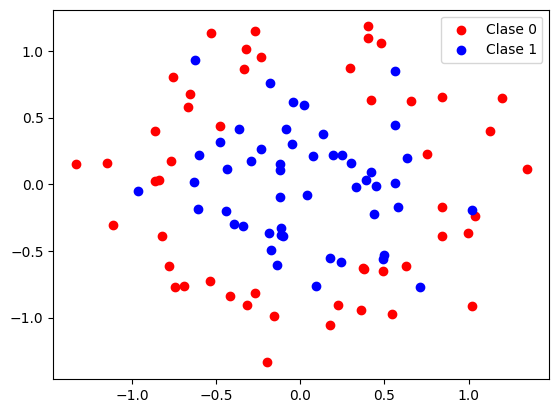

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from matplotlib.patches import Circle

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Generar el dataset make_circles
X, y = make_circles(n_samples=100, noise=0.2, factor=0.5, random_state=42)

# Graficar los puntos de make_circles con colores rojo y azul para cada clase
ax.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Clase 0')
ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Clase 1')

# agregamos la leyenda
ax.legend()

fig.show()

### *Representación del Subjauste: Modelo de IA muy simple que no separa de la mejor manera*

Trazamos una línea recta en $y=0$ la cual representa las predicciones del modelo de IA.

/tmp/ipykernel_6788/1348604006.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


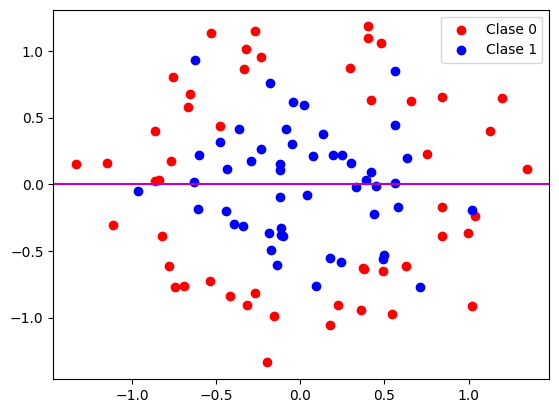

In [2]:
from sklearn.datasets import make_circles
from matplotlib.patches import Circle

# Crear la figura y los ejes
fig, ax = plt.subplots()

ax.axhline(y=0, xmax=0, xmin=1, color="m")

# Generar el dataset make_circles
X, y = make_circles(n_samples=100, noise=0.2, factor=0.5, random_state=42)

# Graficar los puntos de make_circles con colores rojo y azul para cada clase
ax.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Clase 0')
ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Clase 1')

# agregamos la leyenda
ax.legend()

fig.show()

> Como vemos, el modelo es tan simple (una línea recta) que no logra separar las clases.

### *Representación del Sobreajuste: Modelo de IA tan complejo que clasifica el 100% de las muestras durante la fase de entrenamiento*

> En este caso, el modelo se ajusta tan bien a los datos de entrenamiento que logra separar las dos clase en un 100%. Esto podría presentar problemas a la hora de evaluar el modelo con muestras nuevas ya que puede clasificar de manera errónea algunos ejemplos.

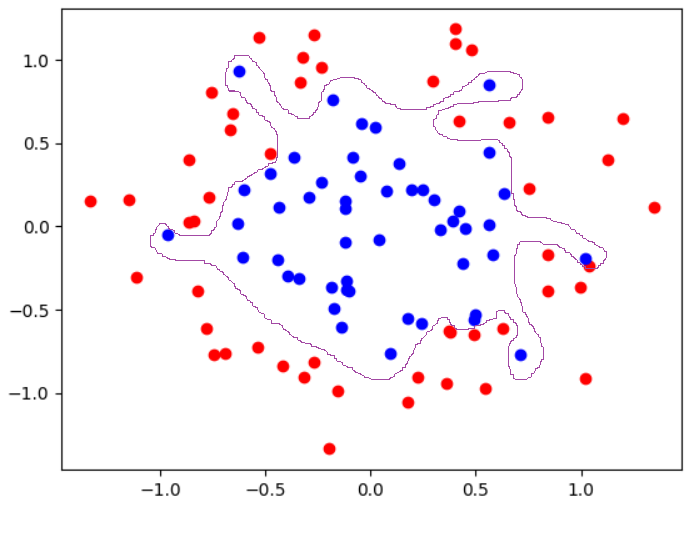

### *Representación de un Modelo de IA ajustado*

/tmp/ipykernel_6788/3808937817.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


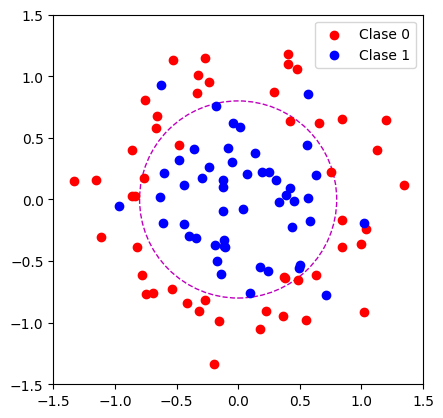

In [3]:
from sklearn.datasets import make_circles
from matplotlib.patches import Circle

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Definir la circunferencia con centro en (0,0) y radio 0.5
circle = Circle((0, 0), .8, color='m', fill=False  , ls='--')
# Añadir la circunferencia a los ejes
ax.add_patch(circle)
# Ajustar los límites de los ejes para que la circunferencia esté bien centrada
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
# Configurar los ejes con la misma escala
ax.set_aspect('equal')

# Generar el dataset make_circles
X, y = make_circles(n_samples=100, noise=0.2, factor=0.5, random_state=42)

# Graficar los puntos de make_circles con colores rojo y azul para cada clase
ax.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Clase 0')
ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Clase 1')

# agregamos la leyenda
ax.legend()

fig.show()

> En este caso, el modelo logra separar gran parte de la clase 1 de la clase 0. Este sería un comportamiento esperado de un modelo de IA debido a que presenta un margen de error mínimo en cuanto a algunas predicciones logrando capturar la mayor parte de la muetras de clase 1.

## **3. ¿Cómo Identificar el sobreajuste?**

Existen dos métodos para evaluar el ajuste del modelo:

* **Gráficas de error (train vs test):** Compara el error de los datos de entrenamiento con los prueba para detectar sobreajuste. Si ambas curvas estan muy cercanas entre sí, se presume que el modelo esta ajustado correctamente a los datos y generaliza muy bien. Si las curvas en un punto se separan, se dice que el modelo esta sobreajustado después de cierto nivel de complejidad del modelo. La complejidad del modelo puede venir representada por la cantidad de capas ocultas, cantidad de neuronas, número de epocas, entre otros.

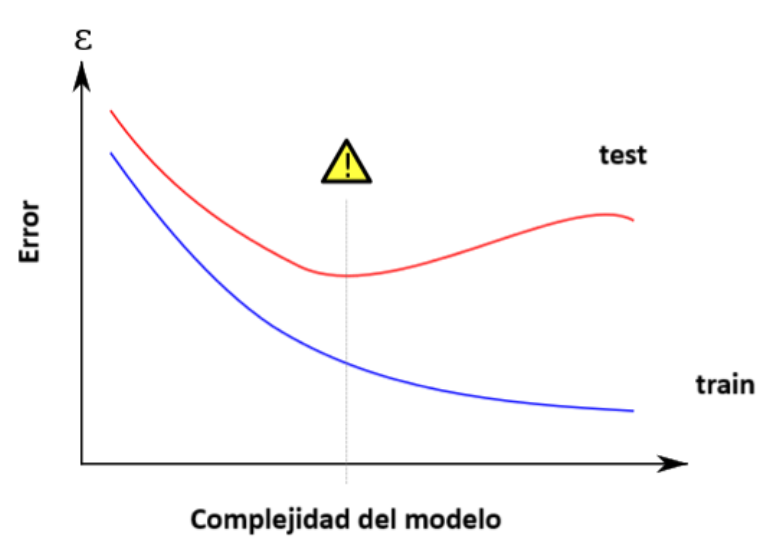


* **Métricas de desempeño:** El uso de métricas como la pérdida ($loss$) y la precisión ($accuracy$) en los datos de entrenamiento y validación permiten identificar si un modelo está sobreajustado o subajustado.

# **Ejemplo práctico de sobreajuste**

Vamos a crear un modelo de red neuronal densa MLP para que reconozca dígitos escritos a mano. Luego de ser entrenada, vamos a evaluarlo y visualizar la gráfica de pérdida para analizar el desempeño del modelo. 

### 1.- Importamos las librerías

Vamos a utilizar el dataset _mnist_ de _tensorflow_ cuyas imágenes estan preprocesadas, por lo que la importamos junto a las librerías necesarias.

In [4]:
import matplotlib.pyplot as plt # libreria para visualizacion de datos
from tensorflow.keras.models import Sequential # libreria para la creacion del modelo
from tensorflow.keras.layers import Dense, Dropout # libreria para la creacion del modelo
from tensorflow.keras.datasets import mnist # base de datos de digitos escritos a mano
from tensorflow.keras.utils import to_categorical # libreria para procesar los datos

2025-02-03 07:00:25.201527: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-03 07:00:25.485592: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-03 07:00:25.841245: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738584025.990136    6788 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738584026.031190    6788 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-03 07:00:26.432335: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

### 2.- Carga y preprocesamiento de lo datos

In [5]:
# cargamos el dataset de imagenes de digitos de 0 a 9 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# redimensionamos las imagenes de 28x28 a vectores de 784 elementos
# normalizamos los valores entre 0 y 1
X_train = X_train.reshape(X_train.shape[0], 28*28).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28*28).astype('float32') / 255

# Transformamos las etiquetas en un vector binario de tamaño 10
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### 3.- Creación del modelo

Se crea un modelo MLP donde todas las neuronas estan interconectadas. La capa de entrada posee 784 neuronas y presenta dos capas ocultas de 512 neuronas cada una con función de activación ReLU. La capa de salida es de 10 neuronas que corresponden a la cantidad de clases, con función de activación softmax que es ideal para clasificación multiclase.

También se aplica una técnica llamada Dropout que consiste en apagar un cierto porcentaje de neuronas con la finalidad de evitar sobreajuste. Profundizarémos más en esta técnica en un futuro Post, en este caso se implementa para cada capa oculta apagando el 50% de las neuronas.

In [6]:
# Crear el modelo con Dropout
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28*28,)))
model.add(Dropout(0.5))  # Regularización con Dropout
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Regularización con Dropout
model.add(Dense(10, activation='softmax'))

/home/jbernal/anaconda3/envs/tf_cpu_3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-02-03 07:00:30.983451: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


### 4.- Compilación del modelo

En la compilación del modelo, utilizamos como función de pérdida _categorical_crossentropy_ ya que es ideal para problemas de clasificación multiclase. Como optimizador, se utiliza el método _adam_ debido a su eficiencia para el descenso del gradiente y como métrica de evaluación se utiliza _accuracy_.

In [7]:
# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### 5.- Entrenamiento del modelo

Se realiza el entrenamiento con 20 épocas usando mini-batches de 128 imágenes. Además, se utiliza el 20% de los datos para la validación y el parámetro _verbose_ se asigna en 1 para que muestre el progreso del entrenamiento.

In [8]:
# Entrenar el modelo y almacenar el historial
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2, verbose=1)

2025-02-03 07:00:31.385272: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.7885 - loss: 0.6704 - val_accuracy: 0.9549 - val_loss: 0.1484
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9438 - loss: 0.1879 - val_accuracy: 0.9661 - val_loss: 0.1088
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9568 - loss: 0.1379 - val_accuracy: 0.9720 - val_loss: 0.0926
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9648 - loss: 0.1152 - val_accuracy: 0.9747 - val_loss: 0.0840
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9692 - loss: 0.0996 - val_accuracy: 0.9758 - val_loss: 0.0806
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9730 - loss: 0.0865 - val_accuracy: 0.9763 - val_loss: 0.0814
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9757 - loss: 0.0793 - val_accuracy: 0.9785 - val_loss: 0.0728
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9775 - loss: 0.0724 - val_a

### 6.- Análisis de las métricas de desempeño

> El modelo muestra un buen rendimiento general, pero muestra un posible sobreajuste.

> En el entrenamiento: el accuracy (Precisión) aumenta progresivamente, yendo de 0.7885 en la primera época hasta 0.984 en la última época. El loss (pérdida) disminuye, llegando a 0.0434 en la última época.

> En la evaluación: el accuracy se mantiene alto, alcanzando 98.19% en la última época. El val_loss (Pérdida de validación) deja de disminuir después de algunas épocas y empieza a oscilar entre el valor 0.07.

> La pérdida de validación deja de mejorar después de la época 5-6. Se observa que la val_loss disminuye al principio, pero luego se estabiliza e incluso aumenta (de 0.0725 en la época 12 a 0.0794 en la última).

> La pérdida de entrenamiento sigue disminuyendo constantemente, lo que indica que el modelo sigue ajustando cada vez más los datos de entrenamiento sin mejorar en validación.

>  El modelo tiene buen rendimiento, pero muestra señales de sobreajuste después de la época 5-6.

### 7.- Evaluación del modelo

Se evalúa el modelo con los datos de prueba y se imprime la pérdida y la precisión generados con tales datos.

In [9]:
# Evaluar el modelo
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06965924054384232
Test accuracy: 0.9807000160217285


### 8.- Gráfica de la pérdida durante el entrenamiento y la validación

Se grafican la pérdida de entrenamiento y la de validación en función de las épocas del modelo. Esto ayuda a visualizar si hay sobreajuste.

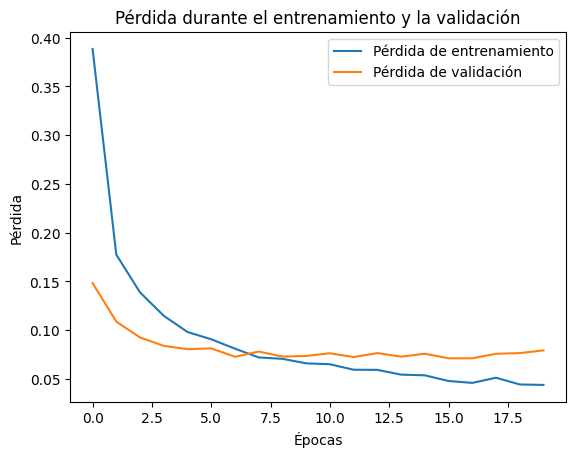

In [10]:
# Graficar las pérdidas de entrenamiento y validación
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

> La grafica muestra que las curvas se cruzan en la época 6. Justo después de esa época la pérdida de entrenamiento sigue disminuyendo ajustandose el modelo cada vez más a los datos. Sin embargo, la pérdida de validación, después de la época 6 deja de disminuir y se estabiliza en 0.07 aproximadamente lo que indica que ante datos nuevos, el desempeño del modelo no mejora.

> Se concluye que el modelo arroja los mejores resultados cuando se entrena con 5 épocas, justo antes del sobreajuste.

> Para mejorar el desempeño del modelo, se puede aplicar otras técnicas como _Early Stopping_, algún tipo de regularización o modificar la cantidad de neuronas que se apagan (_Dropout_).